# **ANÁLISIS EXPLORATORIO DE DATOS (EDA) BIVARIADO**

#**Pre-requisito**

##*Se debe haber llevado a cabo el analisis univariado del dataset*.

In [1]:
# carga de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#**Lectura del dataset**

In [2]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

# carga directorio donde se almacena el .csv
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/"
print(base_dir)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/data/


In [3]:
#Cargamos los CSV con los Datos
clientes_Banco_Uni = pd.read_csv(base_dir + 'Clientes_Banco_Univariado.csv')
clientes_Banco_Uni


,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,no,yes,no,unknown,0,26-60,0-4K
1,technician,single,secondary,no,yes,no,unknown,0,26-60,0-4K
2,entrepreneur,married,secondary,no,yes,yes,unknown,0,26-60,0-4K
3,blue-collar,married,unknown,no,yes,no,unknown,0,26-60,0-4K
4,unknown,single,unknown,no,no,no,unknown,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,no,no,unknown,1,26-60,0-4K
45185,retired,divorced,primary,no,no,no,unknown,1,>60,0-4K
45186,retired,married,secondary,no,no,no,success,1,>60,4K-16K
45187,blue-collar,married,secondary,no,no,no,unknown,0,26-60,0-4K


#**4.3 Análisis bivariado**

Despues de realizar un análisis univariado podemos ir un paso más allá en este análisis exploratorio de datos (EDA) y analizar posibles interacciones entre pares de variables predictoras y su impacto en la variable a predecir.

Esto se conoce como *análisis bivariado*.

Como existen muchas posibles combinaciones analizaremos únicamente los pares con mayor potencial según el orden de importancia definido en el resumen del análisis univariado.


##**Resumen analisis univariado**

Las variables predictoras con mayor impacto en la tasa de aceptacion del producto parecen ser, en orden de importancia

1. **poutcome**: casi 70% de conversión para el nivel "success"
2. **job**: con tasas de 22% y 28% para 'retired' y 'student'
2. **grupos_balance** y **grupos_edad**, con tasas de conversión cercanas al 16% para varios intervalos
3. **default**, **housing** y loan con tasas de conversión entre 12% y 16% para los niveles "no"
4. **marital** y **education**, con niveles de conversión comparables con default, housing y loan.


La forma más sencilla de hacer este análisis es a través de gráficas (aunque también se podrían usar herramientas estadísticas más sofisticadas).

##**Nota**

De forma similar a como ocurre con el análisis univariado, este análisis nos mostrará sólo una faceta de las posibles relaciones entre pares de variables predictoras y la variable a predecir, y no es suficiente para extraer conclusiones definitivas (aunque nos dará una pista más detallada en comparación con el análisis univariado).

In [4]:
# Tasa de aceptacion del producto para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
  tc = clientes_Banco_Uni.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de aceptacion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de aceptacion (%)')
  plt.xlim((0,1));

# 1. Para las variables **poutcome-job**

<ipython-input-4-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


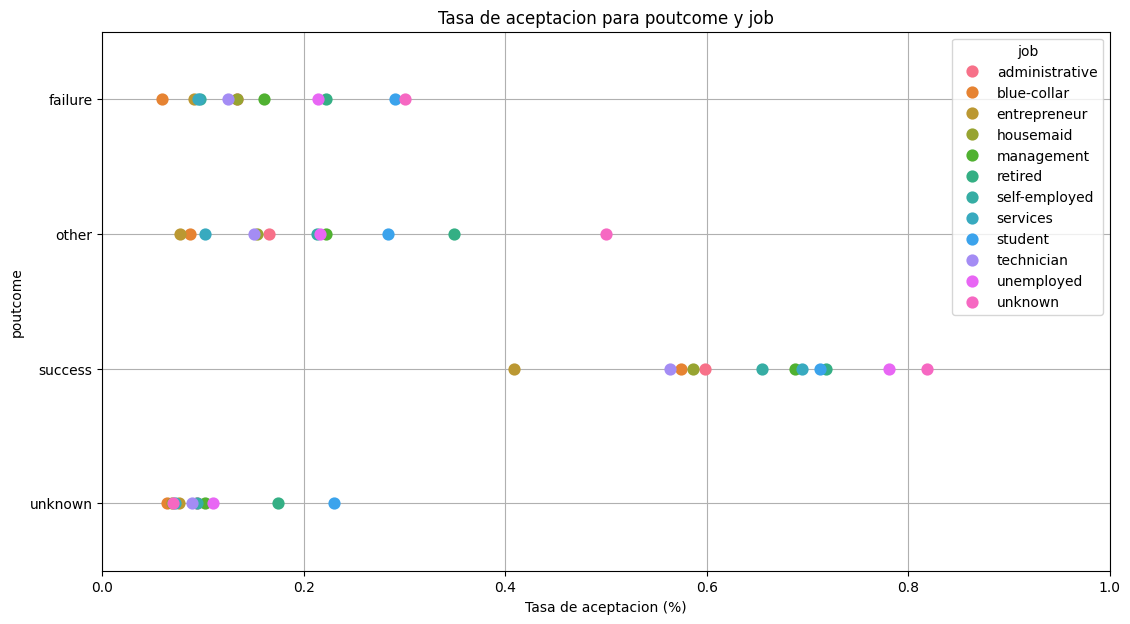

In [5]:
#graficar_tc_bivariada(['job','poutcome'])
graficar_tc_bivariada(['poutcome','job'])
# Tasas de conversión superiores al 60% con campaña de marketing anterior
# poutcome==success y  job = unemployed (78%), student/retired (72%), services
# (70%), management (68%), self-employed (65%) %% 2. Par poutcome-grupos_balance

#2. Para la Variables **poutcome-grupos_balance**

<ipython-input-4-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
<ipython-input-4-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


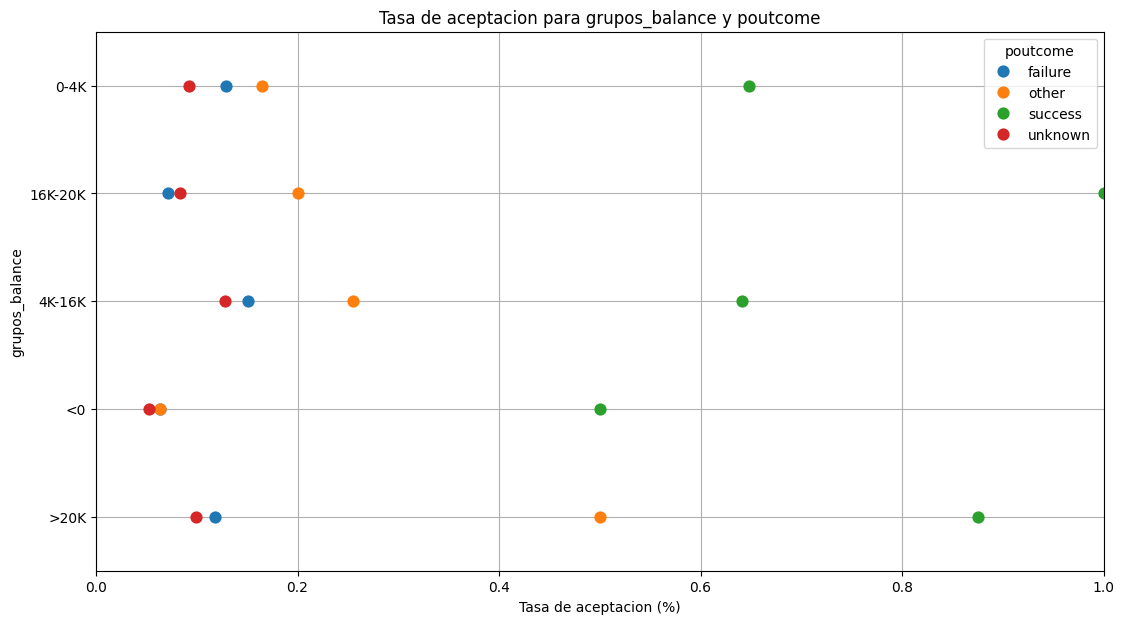

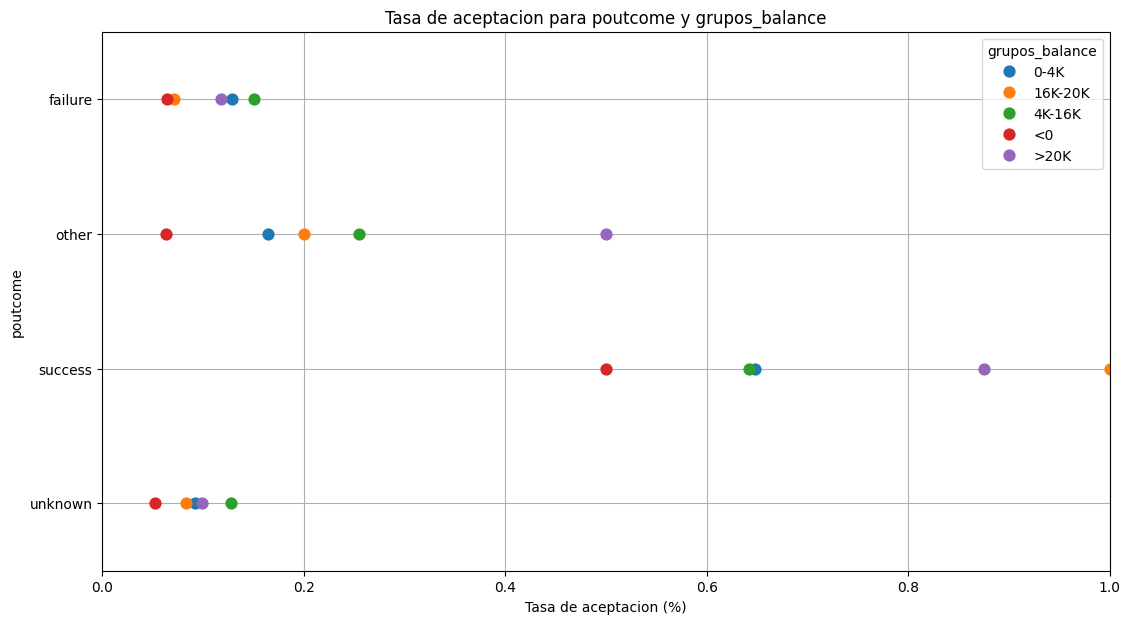

In [6]:
graficar_tc_bivariada(col_list=['grupos_balance','poutcome'])
graficar_tc_bivariada(col_list=['poutcome','grupos_balance'])
# Tasas de aceptacion superiores al 60% para poutcome=success y
# - Ingresos entre 16K y 20K: 100%!!! Es interesante, pues al analizar sólo
#   la variable ingresos en este rango se obtienen las menores tasas de conversión
# - Ingresos superiores a 20K: 88%
# - Ingresos entre 0-16K: 65%

#3. Para las varables **poutcome-grupos_edad**

<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


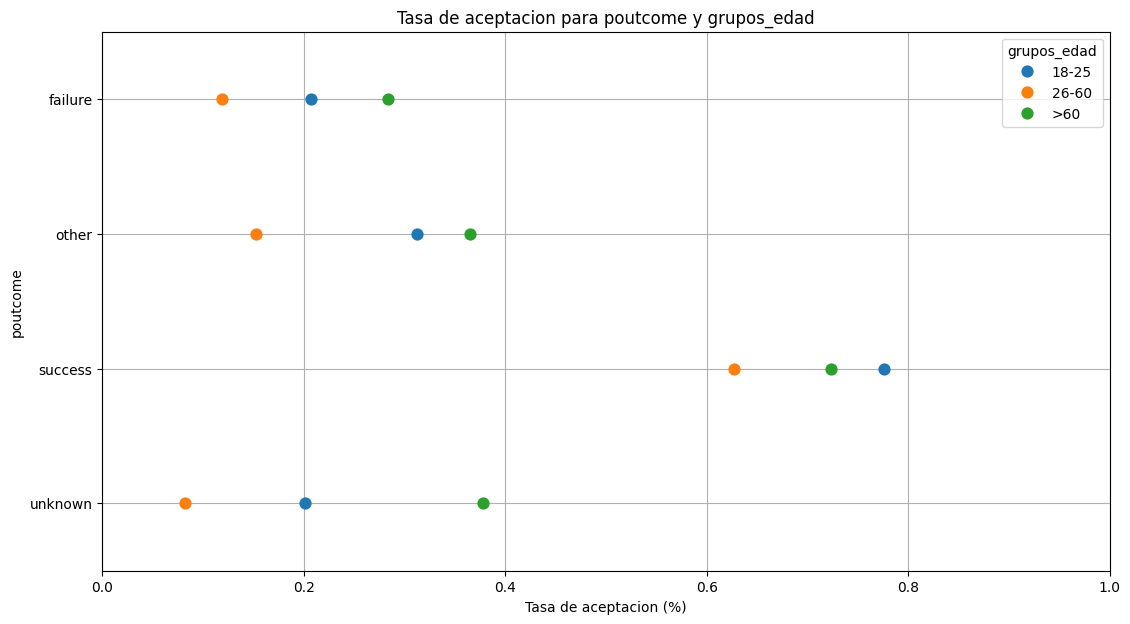

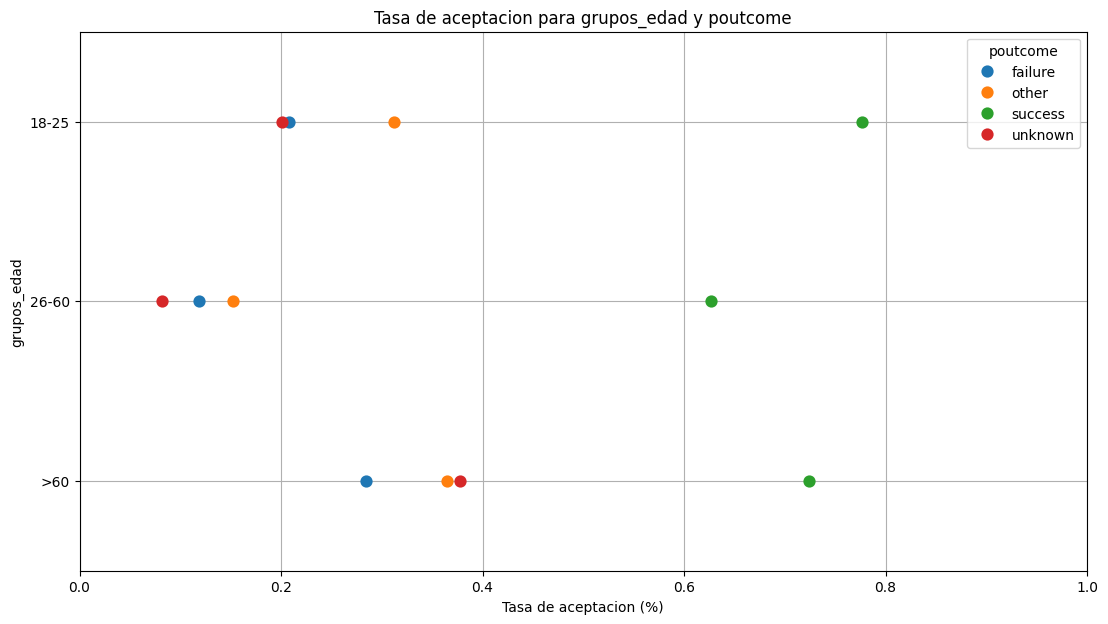

In [ ]:
graficar_tc_bivariada(['poutcome','grupos_edad'])
graficar_tc_bivariada(['grupos_edad','poutcome'])
# Tasas de aceptacion superiores al 60% para poutcome=success y
# - Edades 18-25: 78%
# - Edades >60: 72%
# - Edades 26-60: 62%

#4. Pares de variables **poutcome + default/housing/loan**

<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


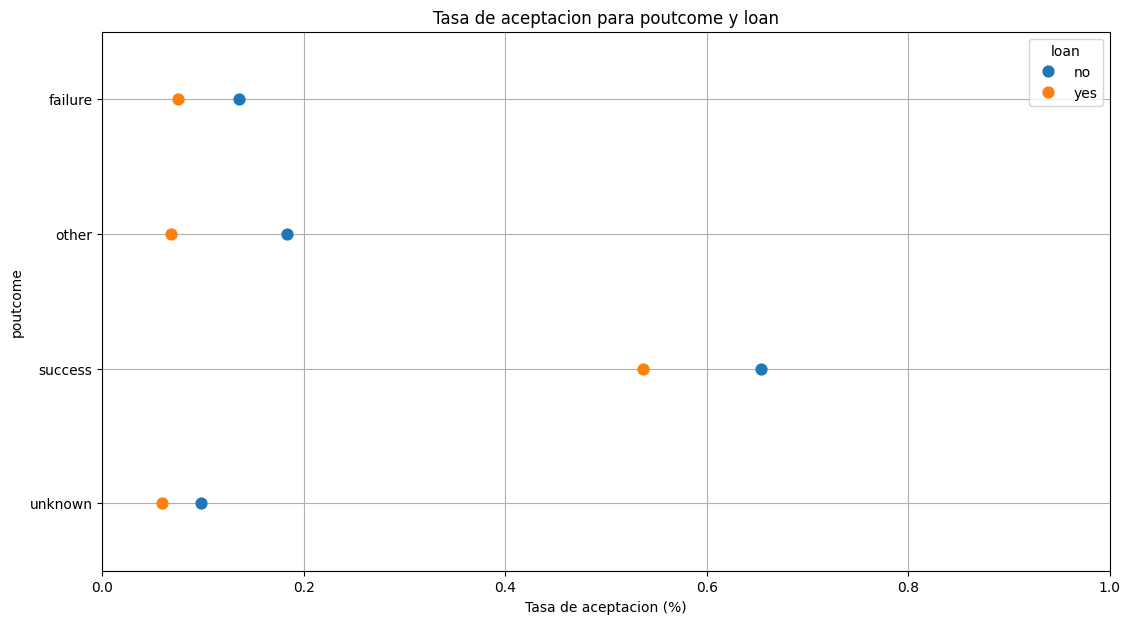

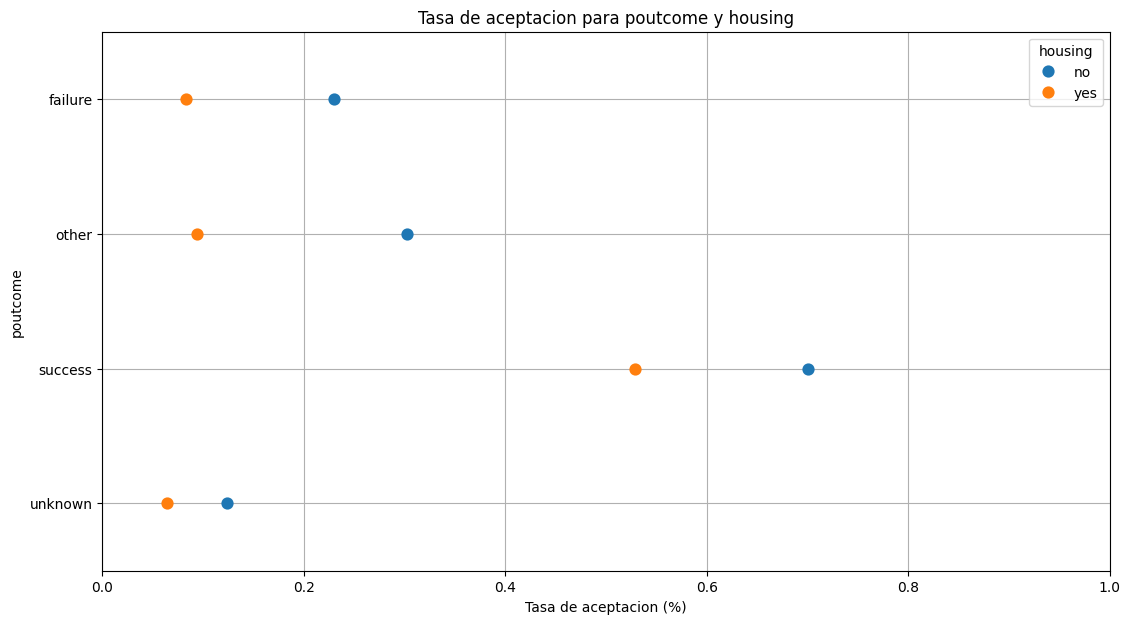

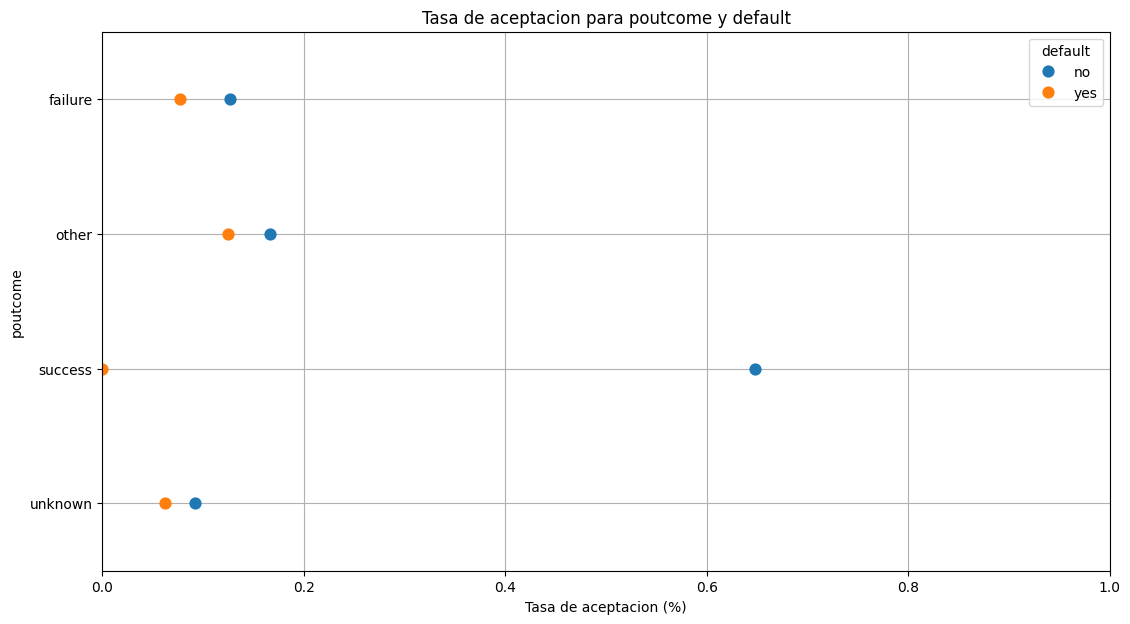

In [ ]:
graficar_tc_bivariada(['poutcome','loan'])
graficar_tc_bivariada(['poutcome','housing'])
graficar_tc_bivariada(['poutcome','default'])
# Se alcanzan tasas de aceptacion entre 60 y 65% para
# las combinaciones poutcome=success y default/housing/loan=no

#4. Pares variables **poutcome + marital/education**

<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
<ipython-input-7-a6e6a98da65a>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


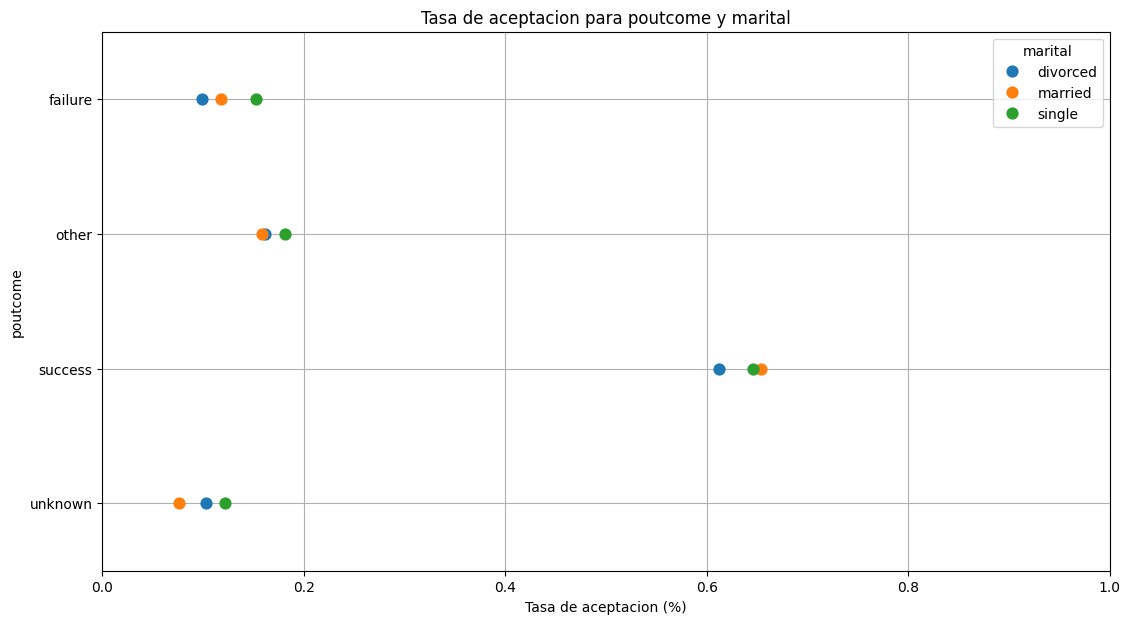

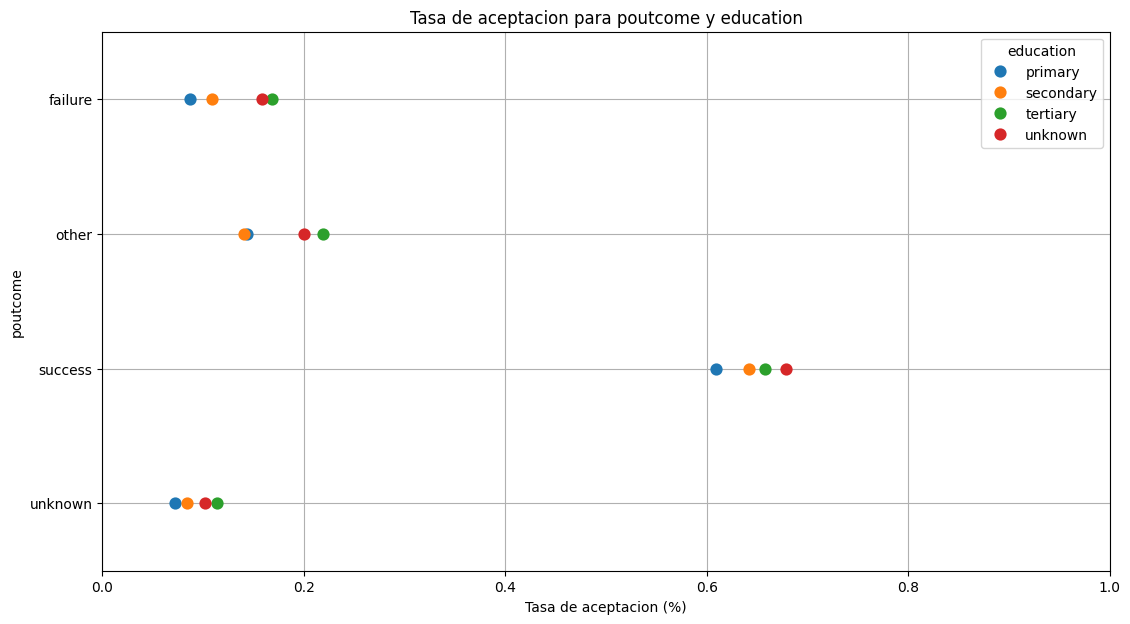

In [ ]:
graficar_tc_bivariada(['poutcome','marital'])
graficar_tc_bivariada(['poutcome','education'])

# - Se alcanzan tasas de aceptacion entre 60 y 65% independientemente de "marital"
# - Y lo mismo para "education"

# Estas variables no resultan tan relevantes

##**Resumen**

# Conclusiones

1. La variable "**poutcome**" (campaña de marketing anterior) seguida de las variables "**job**", "**grupos_balance**" y "**grupos_edad**" son las que tienen mayor impacto en la tase de aceptacion del CDT.
2. Con este análisis el perfil ideal de cliente sería:
    - Debe haber **sido contactado previamente** por el banco y debe haber **adquirido previamente dicho producto** (*poutcome == success*)
    - Perfil laboral (top-3): desempleado, estudiante, jubilado
    - Saldo en su cuenta bancaria: entre 16K y 20K (preferiblemente)
    - Edad: entre 18 y 25 años (preferiblemente)
    - Que NO cuente con crédito de consumo, crédito hipotecario o que no haya entrado en mora "default"


Es posible que la combinación de más de dos variables (análisis multivariado) arroje más luces sobre estos perfiles. Pero en este caso la interpretación de los resultados se dificulta a medida que analizamos de manera simultánea más y más variables.

En este punto el paso a seguir sería usar algún modelo de ***Machine Learning*** que permita encontrar esos patrones que no resultan fáciles de ver con este análisis exploratorio.